# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [ ]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://miptstats.github.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [2]:
data = pd.read_csv("/home/endeavour/train.csv")

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [3]:
training_dt = data.sample(frac = 0.7)
testing_dt = data.drop(training_dt.index)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [4]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [5]:
training_features, training_target = get_features_and_target(training_dt)
testing_features, testing_target = get_features_and_target(testing_dt)

Разделим обучающие данные на две части - данные мужчин и женщин.

In [6]:
men = training_dt.loc[training_dt['Sex'] == "male"]
women = training_dt.drop(men.index)

Далее рассмотрим зависимость выживаемости от различных признаков.

Text(0.5, 1.0, 'Среди женщин')

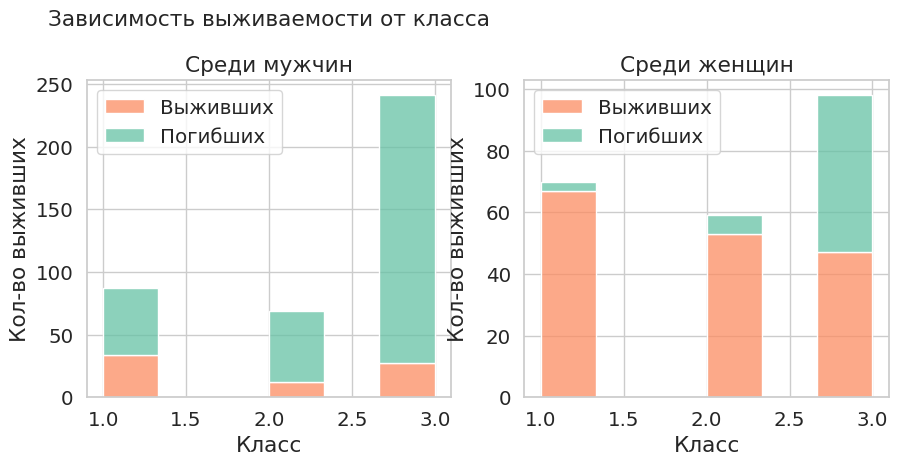

In [7]:
plt.figure(figsize=(16, 14))

plt.subplot(331)
sns.histplot(data=men, x='Pclass', hue='Survived', multiple="stack", bins=6)
plt.xlabel("Класс")
plt.ylabel("Кол-во выживших")
plt.legend(["Выживших", "Погибших"])
plt.title("Зависимость выживаемости от класса\n\nСреди мужчин")

plt.subplot(332)
sns.histplot(data=women, x='Pclass', hue='Survived', multiple="stack", bins=6)
plt.xlabel("Класс")
plt.ylabel("Кол-во выживших")
plt.legend(["Выживших", "Погибших"])
plt.title("Среди женщин")

Text(0.5, 1.0, '\n\n')

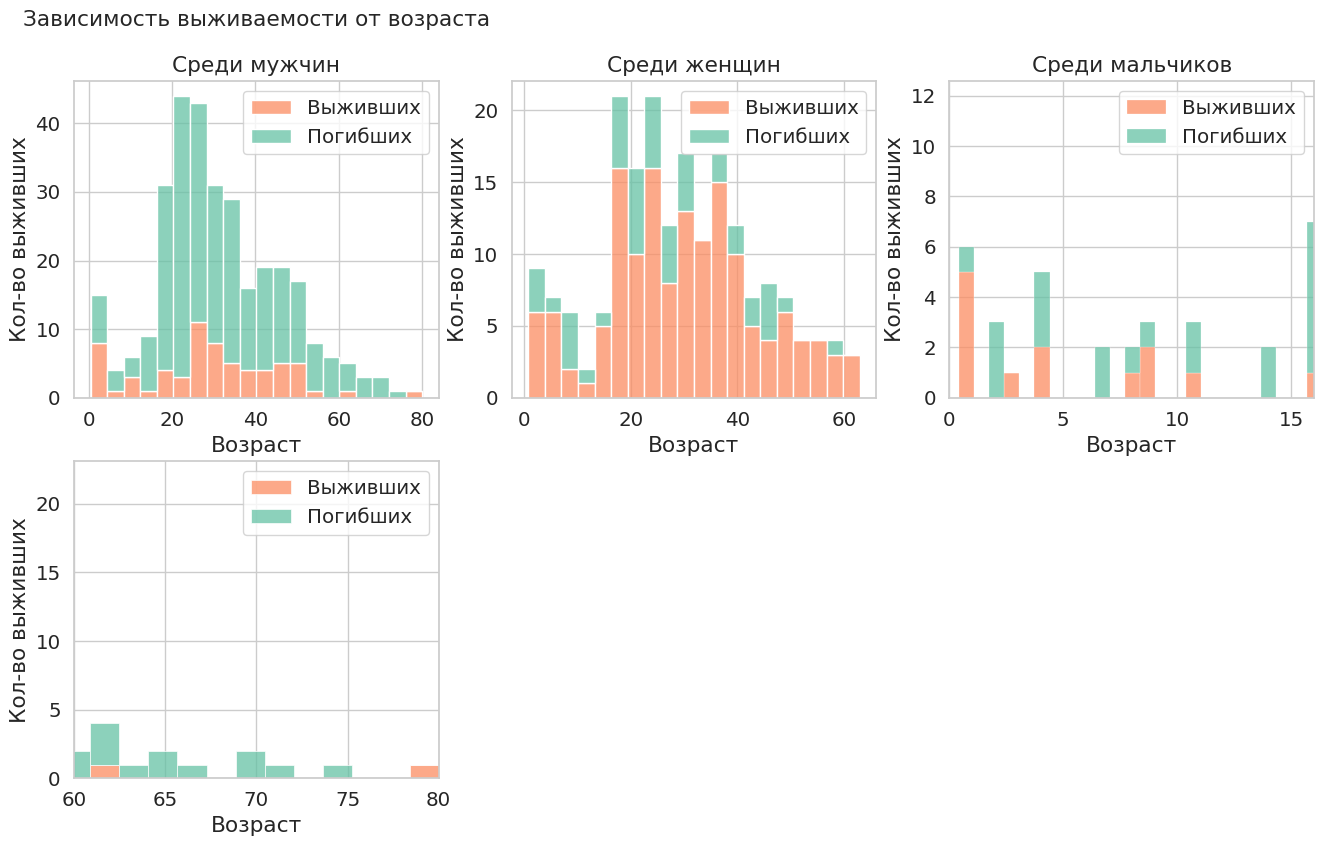

In [65]:
plt.figure(figsize=(16, 14))

plt.subplot(331)
sns.histplot(data=men, x='Age', hue='Survived', multiple="stack", bins=20)
plt.xlabel("Возраст")
plt.ylabel("Кол-во выживших")
plt.legend(["Выживших", "Погибших"])
plt.title("Зависимость выживаемости от возраста\n\nСреди мужчин")

plt.subplot(332)
sns.histplot(data=women, x='Age', hue='Survived', multiple="stack", bins=20)
plt.xlabel("Возраст")
plt.ylabel("Кол-во выживших")
plt.legend(["Выживших", "Погибших"])
plt.title("Среди женщин")

plt.subplot(333)
sns.histplot(data=men, x='Age', hue='Survived', multiple="stack", bins=120)
plt.xlim(0,16)
plt.xlabel("Возраст")
plt.ylabel("Кол-во выживших")
plt.legend(["Выживших", "Погибших"])
plt.title("Среди мальчиков")

plt.subplot(334)
sns.histplot(data=men, x='Age', hue='Survived', multiple="stack", bins=50)
plt.xlim(60,80)
plt.xlabel("Возраст")
plt.ylabel("Кол-во выживших")
plt.legend(["Выживших", "Погибших"])
plt.title("\n\n")

Рассмотрим только тех людей у кого меньше 4 братьев/сестер, так как других очень мало.
И чтобы было удобнее рассморим также график с долями.

Text(0.5, 1.0, 'Среди женщин')

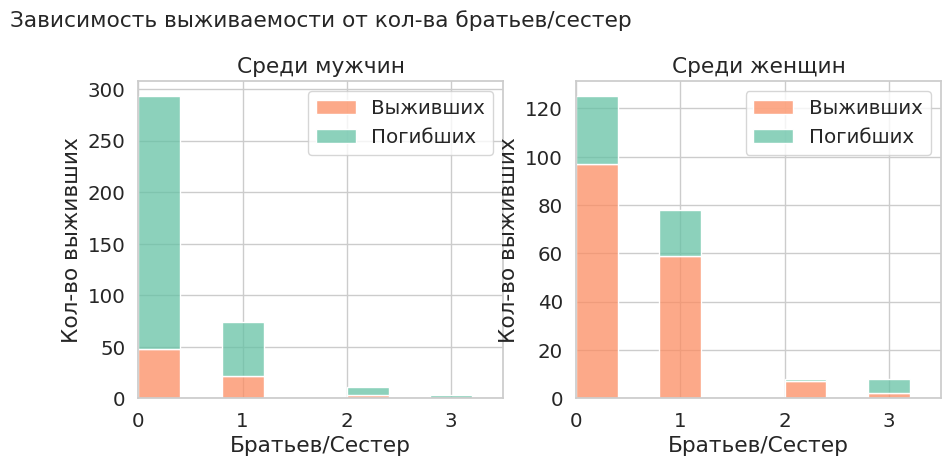

In [63]:
plt.figure(figsize=(16, 14))

plt.subplot(331)
sns.histplot(data=men, x='SibSp', hue='Survived', multiple="stack", bins=20)
plt.xlim(0, 3.5)
plt.xlabel("Братьев/Сестер")
plt.ylabel("Кол-во выживших")
plt.legend(["Выживших", "Погибших"])
plt.title("Зависимость выживаемости от кол-ва братьев/сестер\n\nСреди мужчин")

plt.subplot(332)
sns.histplot(data=women, x='SibSp', hue='Survived', multiple="stack", bins=20)
plt.xlim(0, 3.5)
plt.xlabel("Братьев/Сестер")
plt.ylabel("Кол-во выживших")
plt.legend(["Выживших", "Погибших"])
plt.title("Среди женщин")

Text(0.5, 1.0, 'Среди женщин')

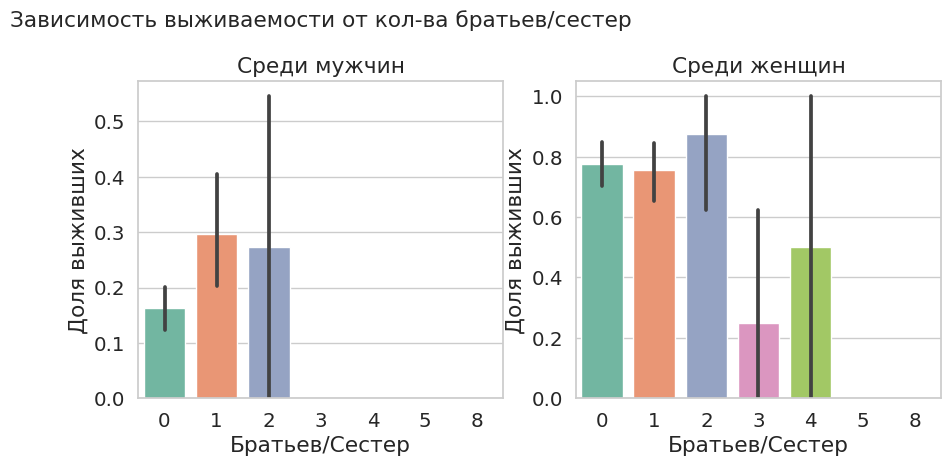

In [55]:
plt.figure(figsize=(16, 14))

plt.subplot(331)
sns.barplot(data=men, x='SibSp', y='Survived')
plt.xlabel("Братьев/Сестер")
plt.ylabel("Доля выживших")
plt.title("Зависимость выживаемости от кол-ва братьев/сестер\n\nСреди мужчин")

plt.subplot(332)
sns.barplot(data=women, x='SibSp', y='Survived')
plt.xlabel("Братьев/Сестер")
plt.ylabel("Доля выживших")
plt.title("Среди женщин")

Рассмотрим только тех людей у кого меньше 4 детей/родителей, так как других очень мало.
Также приведем графики с долями выживших чтобы было удобнее судить о соотношениях выживших при данных условиях.

Text(0.5, 1.0, 'Среди женщин')

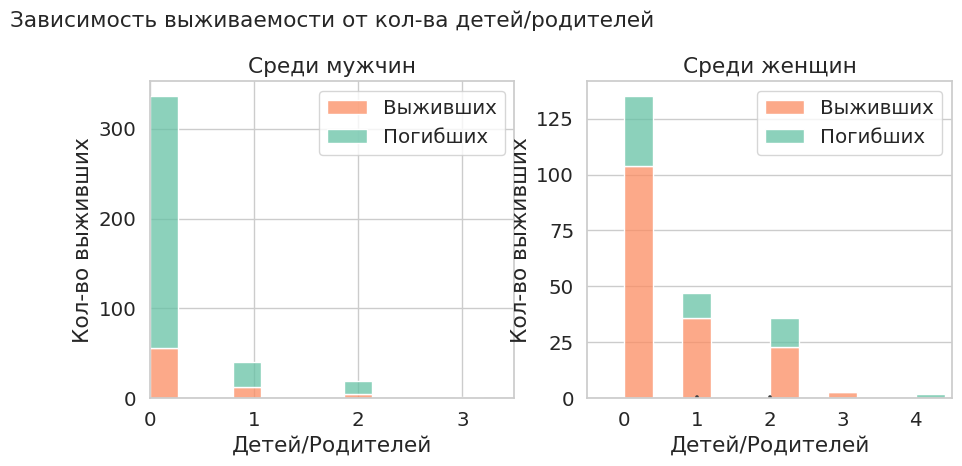

In [48]:
plt.figure(figsize=(16, 14))

plt.subplot(331)
sns.histplot(data=men, x='Parch', hue='Survived', multiple="stack", bins=15)
plt.xlim(0, 3.5)
plt.xlabel("Детей/Родителей")
plt.ylabel("Кол-во выживших")
plt.legend(["Выживших", "Погибших"])
plt.title("Зависимость выживаемости от кол-ва детей/родителей\n\nСреди мужчин")

plt.subplot(332)
sns.histplot(data=women, x='Parch', hue='Survived', multiple="stack", bins=15)
plt.xlim(0, 4.5)
plt.xlabel("Детей/Родителей")
plt.ylabel("Кол-во выживших")
plt.legend(["Выживших", "Погибших"])
plt.title("Среди женщин")

Text(0.5, 1.0, 'Среди женщин')

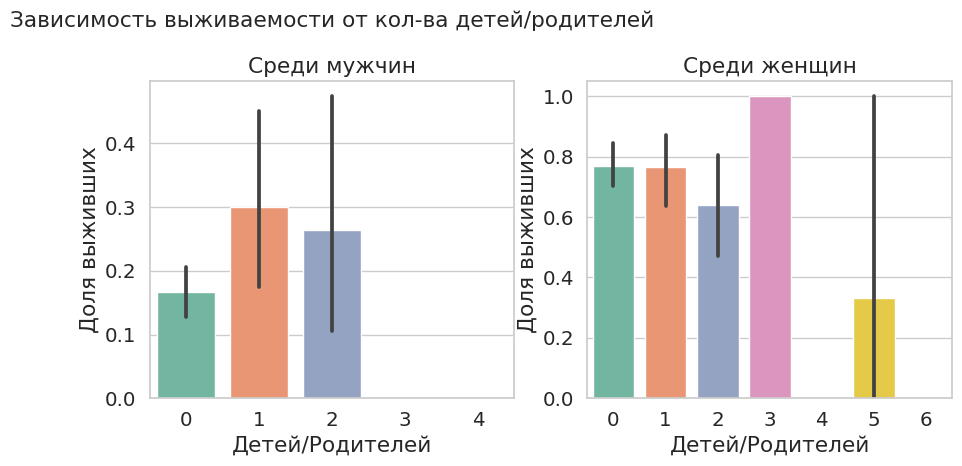

In [54]:
plt.figure(figsize=(16, 14))

plt.subplot(331)
sns.barplot(data=men, x='Parch', y='Survived')
plt.xlabel("Детей/Родителей")
plt.ylabel("Доля выживших")
#plt.legend(["Выживших", "Погибших"])
plt.title("Зависимость выживаемости от кол-ва детей/родителей\n\nСреди мужчин")

plt.subplot(332)
sns.barplot(data=women, x='Parch', y='Survived')
plt.xlabel("Детей/Родителей")
plt.ylabel("Доля выживших")
#plt.legend(["Выживших", "Погибших"])
plt.title("Среди женщин")

Не будем рассматривать выбросы. То есть рассмотрим только таких мужчин, чей билет стоит дешевле 120, и тех женщин чей билет дешевле 280.

Text(0.5, 1.0, 'Среди женщин')

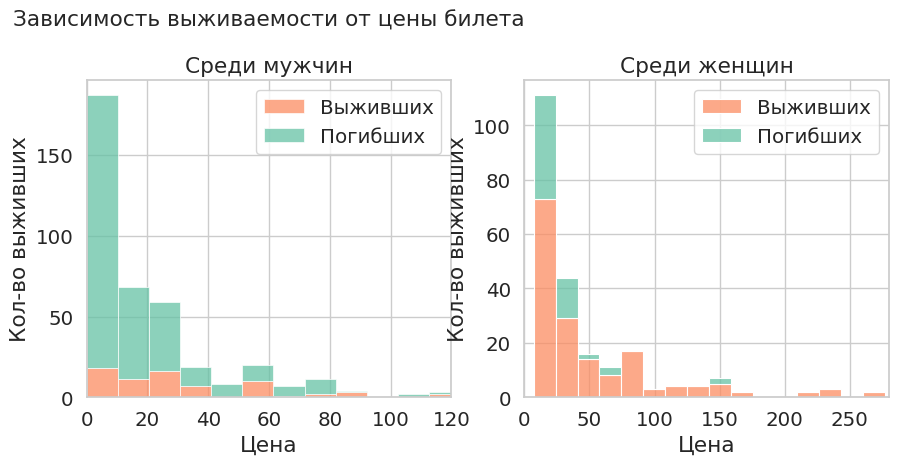

In [44]:
plt.figure(figsize=(16, 14))

plt.subplot(331)
sns.histplot(data=men, x='Fare', hue='Survived', multiple="stack", bins=50)
plt.xlim(0, 120)
plt.xlabel("Цена")
plt.ylabel("Кол-во выживших")
plt.legend(["Выживших", "Погибших"])
plt.title("Зависимость выживаемости от цены билета\n\nСреди мужчин")

plt.subplot(332)
sns.histplot(data=women, x='Fare', hue='Survived', multiple="stack", bins=30)
plt.xlim(0, 280)
plt.xlabel("Цена")
plt.ylabel("Кол-во выживших")
plt.legend(["Выживших", "Погибших"])
plt.title("Среди женщин")

In [147]:
def tree_alive(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    
    Женщина, у которой не юольше 2 братьев/сестер выживет с большой вероятностью

    '''
    predicted = pd.Series((features['Sex'] == "female") & (features['SibSp'] <= 2))
    ...
    return predicted

In [148]:
def tree_dead(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.

    Мужчины, с билетом дешевле 20 погибнут с большой вероятностью

    '''
    predicted = pd.Series((features['Sex'] == "male") & (features['Fare'] < 20))
    ...
    return predicted

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

...

Реализуйте данный критерий по шаблону

In [152]:
tree_dead(testing_features)

2      False
5       True
13     False
14     False
18     False
       ...  
874    False
881     True
883     True
884     True
885    False
Length: 267, dtype: bool

In [153]:
tree_alive(testing_features)

2       True
5      False
13     False
14      True
18      True
       ...  
874     True
881    False
883    False
884    False
885     True
Length: 267, dtype: bool

Чтобы правильно оценить корректность наших деревьев мы должны посчитать кол-во выживших из testing_targets (в случае с tree_dead наоборот погибших, поэтому там target_sum += (1 - target[i])), индексы которых соответсвуют индексам predicted со значением 1 (true). А потом делим полученный target_sum на predicted.sum()
Таким образом мы посчитаем все достаточно корректно и при этом это число будет очевидно всегда меньше 1

In [138]:
def criteria_dead(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    target_sum = 0
    
    for i in predicted.index:
        if(predicted[i] == 1):
            target_sum += (1 - target[i])
    return target_sum / predicted.sum()
    ...

In [149]:
def criteria_alive(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    target_sum = 0
    
    for i in predicted.index:
        if(predicted[i] == 1):
            target_sum += target[i]
    return target_sum / predicted.sum()
    ...

Посчитайте качество полученных ранее деревьев.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [150]:
criteria_dead(testing_target, tree_dead(testing_features))

0.8416666666666667

In [151]:
criteria_alive(testing_target, tree_alive(testing_features))

0.7804878048780488

**5. Метод ближайшего соседа**

В домашнем задании 1 вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [ ]:
def knn(features, train_features, train_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''
    
    ...
    return predicted

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

#### 6. Выводы

С помощью табличек выше мы можем с достаточно большой вероятностью предугадать правильный ответ. Как видно из тестов в задании 4 достаточно проверить только 2 условия и мы сможем получить правильный ответ с вероятностью около восьмидесяти процентов.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

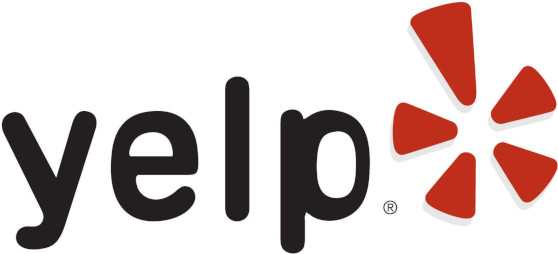

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [ ]:
...

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [ ]:
...

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [ ]:
...

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

In [ ]:
...

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб. Рекомендуется сохранить карту в html и отправить ее отдельным файлом в бот.

In [ ]:
...

Если все получилось, вы молодцы! Далее в этой задаче тоже можно делать интерактивные карты.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [ ]:
...

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [ ]:
...

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [ ]:
...

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [ ]:
...

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [ ]:
...

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [ ]:
...

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [ ]:
...

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [ ]:
...

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** <...>

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [ ]:
...

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** <...>

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [ ]:
...

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
...

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>